# 2-1

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = "SimHei"  # 正常显示中文

# 消除警告的命令
import warnings
warnings.filterwarnings("ignore")

# 读取 LR_new.csv
lr_new_data = pd.read_csv('LR_new.csv')

### 图表1 数据

In [6]:
# 将 Accper 列转换为日期时间对象
lr_new_data['Accper'] = pd.to_datetime(lr_new_data['Accper'])

# 筛选出2019年9月的数据
september_2019_data = lr_new_data[(lr_new_data['Accper'].dt.year == 2019) & (lr_new_data['Accper'].dt.month == 9)]

# 按行业大类进行分组，并计算利润总额的均值
mean_profit_by_industry = september_2019_data.groupby('Indnme')['B001000000'].mean()

# 输出结果
print(mean_profit_by_industry)

Indnme
公用事业    4.380380e+08
商业      5.707120e+08
工业      5.741168e+08
房地产     2.229092e+09
综合      3.067867e+08
金融      9.467487e+08
Name: B001000000, dtype: float64


### 图表1 - 2019年9月各行业大类的利润对比（柱状图）

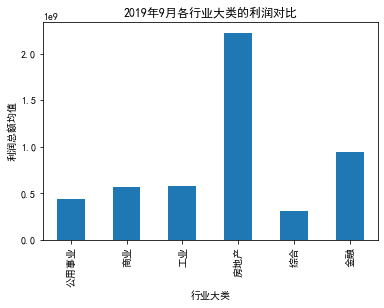

In [7]:
mean_profit_by_industry.plot(kind='bar', title='2019年9月各行业大类的利润对比')
plt.xlabel('行业大类')
plt.ylabel('利润总额均值')
plt.show()

### 图表2 数据

In [29]:
# 将 Accper 列转换为日期时间对象
lr_new_data['Accper'] = pd.to_datetime(lr_new_data['Accper'])

# 筛选出2018年1月至2019年9月的数据
period_data = lr_new_data[(lr_new_data['Accper'].dt.year >= 2018) & (lr_new_data['Accper'].dt.year <= 2019)]

# 提取季度信息
period_data['Quarter'] = period_data['Accper'].dt.to_period('Q')

# 按行业大类和季度进行分组，并计算利润率的均值
mean_profit_rate_by_industry = period_data.groupby(['Indnme', 'Quarter'])['利润率'].mean()

# 输出结果
print(mean_profit_rate_by_industry)

Indnme  Quarter
公用事业    2018Q1     0.123878
        2018Q2     0.134898
        2018Q3     0.130161
        2018Q4     0.039014
        2019Q1     0.071129
        2019Q2     0.109629
        2019Q3     0.113035
商业      2018Q1     0.059997
        2018Q2     0.036759
        2018Q3     0.026649
        2018Q4     0.020995
        2019Q1     0.038165
        2019Q2     0.043507
        2019Q3     0.046038
工业      2018Q1     0.098394
        2018Q2     0.098617
        2018Q3     0.097515
        2018Q4     0.061311
        2019Q1     0.075916
        2019Q2     0.089433
        2019Q3     0.090214
房地产     2018Q1     0.138546
        2018Q2     0.128353
        2018Q3     0.118209
        2018Q4     0.118550
        2019Q1     0.110268
        2019Q2     0.132033
        2019Q3     0.115361
综合      2018Q1     0.042386
        2018Q2     0.017834
        2018Q3     0.047833
        2018Q4    -0.045770
        2019Q1    -0.025029
        2019Q2     0.036441
        2019Q3     0.029525
金融  

### 图表2 - 2018年1月至2019年9月各行业大类利润率变化（折线图）

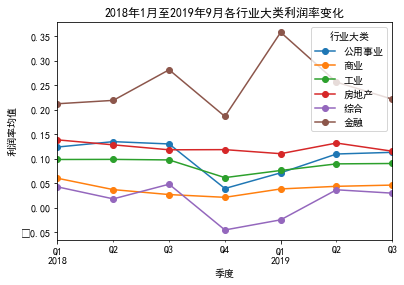

In [28]:
# 重新排列数据，使行业大类成为列，季度成为索引
mean_profit_rate_by_industry = mean_profit_rate_by_industry.unstack(level='Indnme')

# 设置图表尺寸
# plt.figure(figsize=(12,8), dpi=300)

# 绘制折线图
mean_profit_rate_by_industry.plot(marker='o')
plt.title('2018年1月至2019年9月各行业大类利润率变化')
plt.xlabel('季度')
plt.ylabel('利润率均值')
plt.legend(title='行业大类')
plt.show()